# Example - SOFI Reconstruction Convergence Exploration

In this notebook, we explore the convergence of SOFI cumulant reconstructions with respect to the acquisition movie length (frame number). We first generate a simulated video with 20,000 frames, then build multiple SOFI reconstructions on a part of the video with increasing number of frames. 

More specifically, reconstructions are calculated for the first 1000 frames, 2000 frames, ..., 19000 frames and the whole video (20000 frames). The vitual brightness from reconstructions are compared with theoretical values, and the difference between the theoretical and calculated are explored as a function of video length. The details and specs of the simulation can be found at the end of this notebook.

For this video, we found that cumulant reconstructions converge at around 15,000 frames. This number is dependent on multiple aspects, e.g. noise level, on-time-ratio and cumulant value, acquisition rate, etc. More details are discussed in this [paper](https://www.biorxiv.org/content/10.1101/545574v2.full.pdf).

We hope this notebook can provide insights and help users determine the specs for their data acquisition.

### Load and format reconstructions.

We have already pre-processed the video using pysofi and generated cumulant-reconstructed images from the second order to the seventh order for videos with 1000 - 20,000 frames with 1000-frame intervals. An example can be found in this [notebook](). Reconstructions are saved in '.npy' files as dictionary arries with increasing number of frames (1000 to 20,000 frames). Each dictionary is generated from pysofi <code>reconstruction.calc_block_moments</code> and <code>reconstruction.calc_cumulants_from_moments</code>, with order as keys and reconstructed image as values. 

Here, we load the reconstructions from three files and combine them into one array. We also determine the theoretical virtual brightness signs at different orders based on the on-time-ratio feeded into the simulation ($\rho = 0.322$), and explore the converegence of the reconstruction for different orders.

In [9]:
import sys
sys.path.append('..')
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data1 = load('../sampledata/simulations/convergence_demo/frame1000_10000.npy',allow_pickle=True)
data2 = load('../sampledata/simulations/convergence_demo/frame11000_16000.npy',allow_pickle=True)
data3 = load('../sampledata/simulations/convergence_demo/frame17000_20000.npy',allow_pickle=True)
# put together all reconstructions
allframe_data = np.append(np.append(data1, data2), data3)
theo_sign = [-1, -1, 1, 1]    # theoretical cumulant sign at order = 4 - 7
frame_lst = list(range(1000, 21000, 1000))    # frame number from 1000 to 20000

When $\rho = 0.322$, from the second to seventh order, signs for theoretical cumulant values are positive, positive, negative, negative, positive and positive (1, 1, -1, -1, 1, 1). 

Below are some examples of cumulant reconstructions from the second to seventh order for three different number of frames. The calculated cumulant values may not match the theoretical values. For different frame numbers, the reconstructions (especially for higher orders) fluctuate and show different features. This is why we need to determine the specs of data acquisition, especailly the acquisition length to achieve convergence and statistical significance.

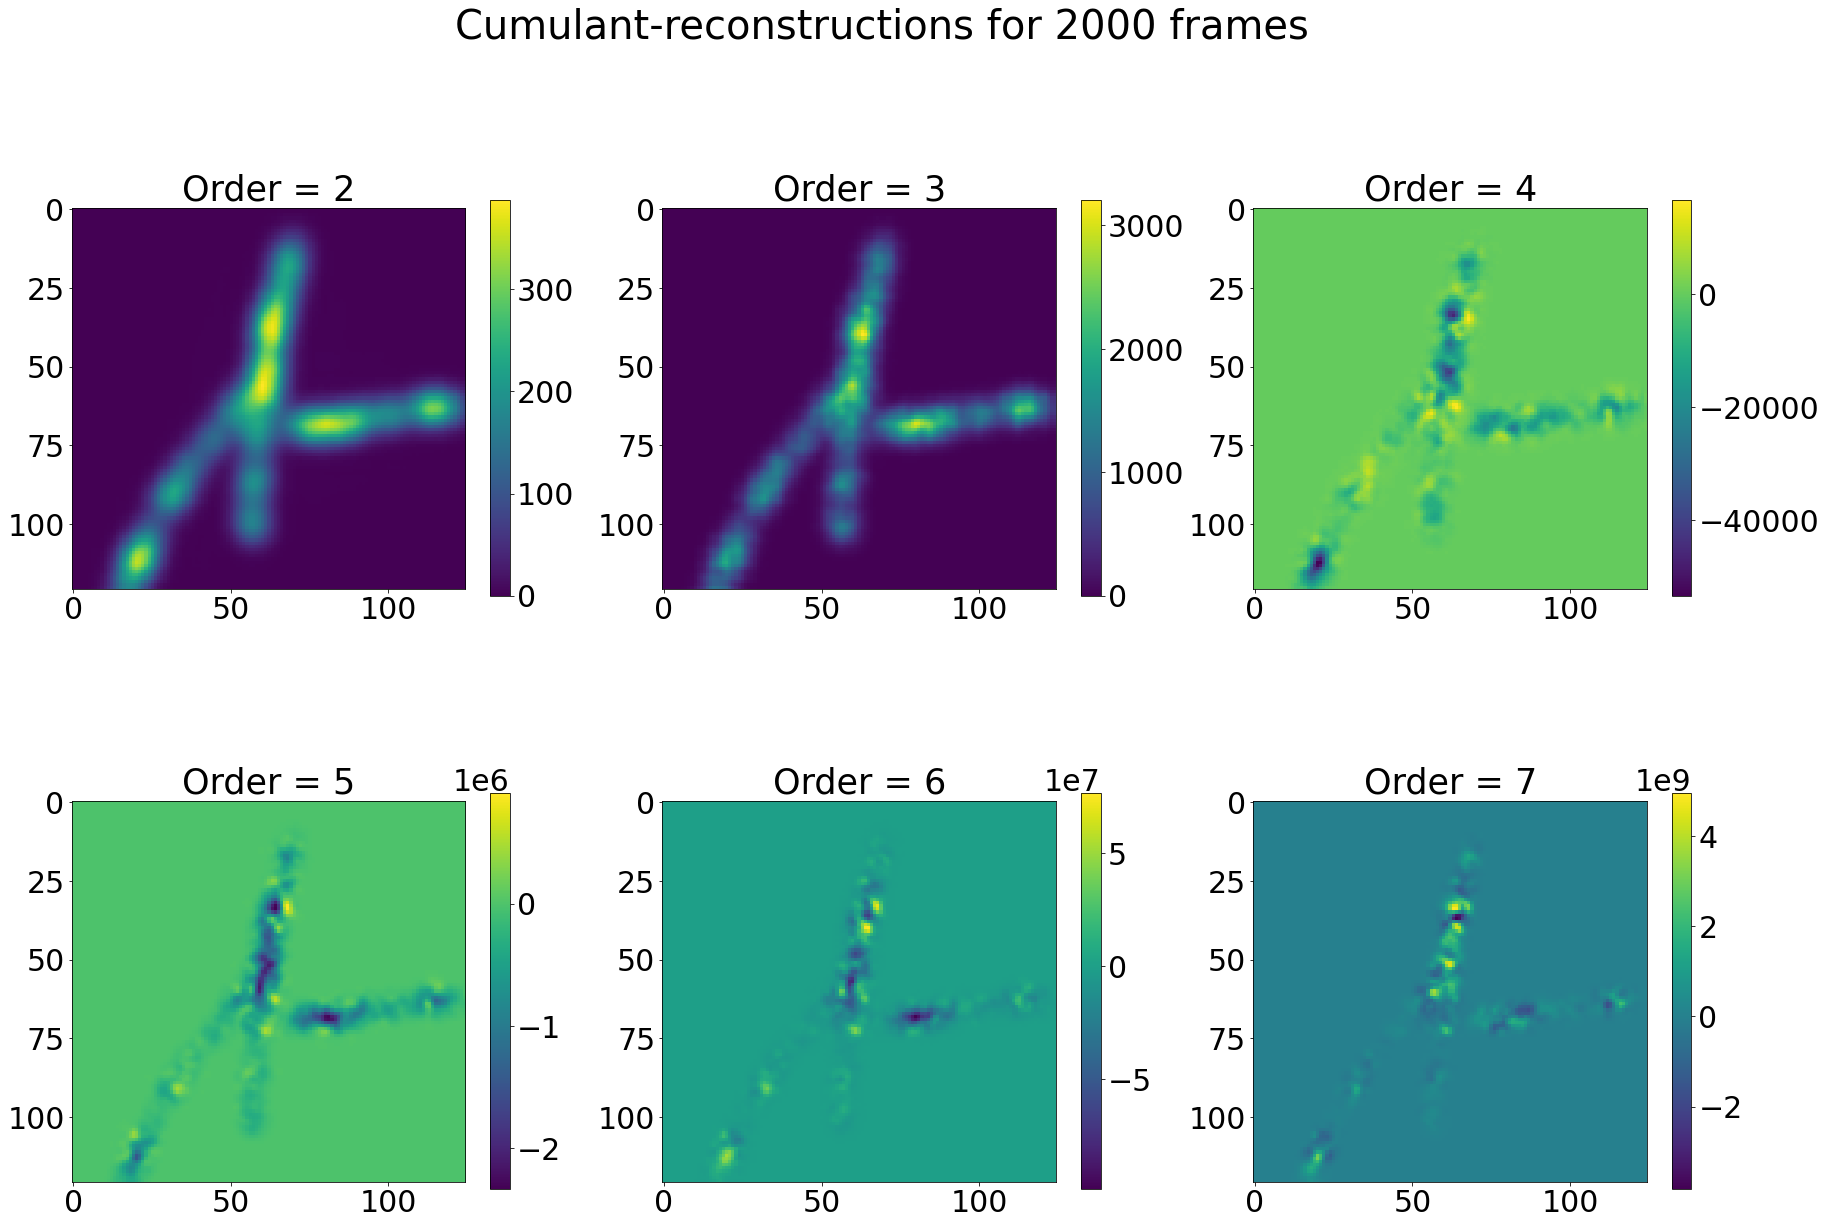

In [32]:
# plot example reconstructions (frame number = 2000, 5000, 15000)
# 1. frame number = 2000
k_set = allframe_data[1]
fig, axs = plt.subplots(2,3,figsize=(30,20))
fig.suptitle("Cumulant-reconstructions for 2000 frames", fontsize=40)
for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow(k_set[i]*0.8)
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax, shrink=0.8)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)

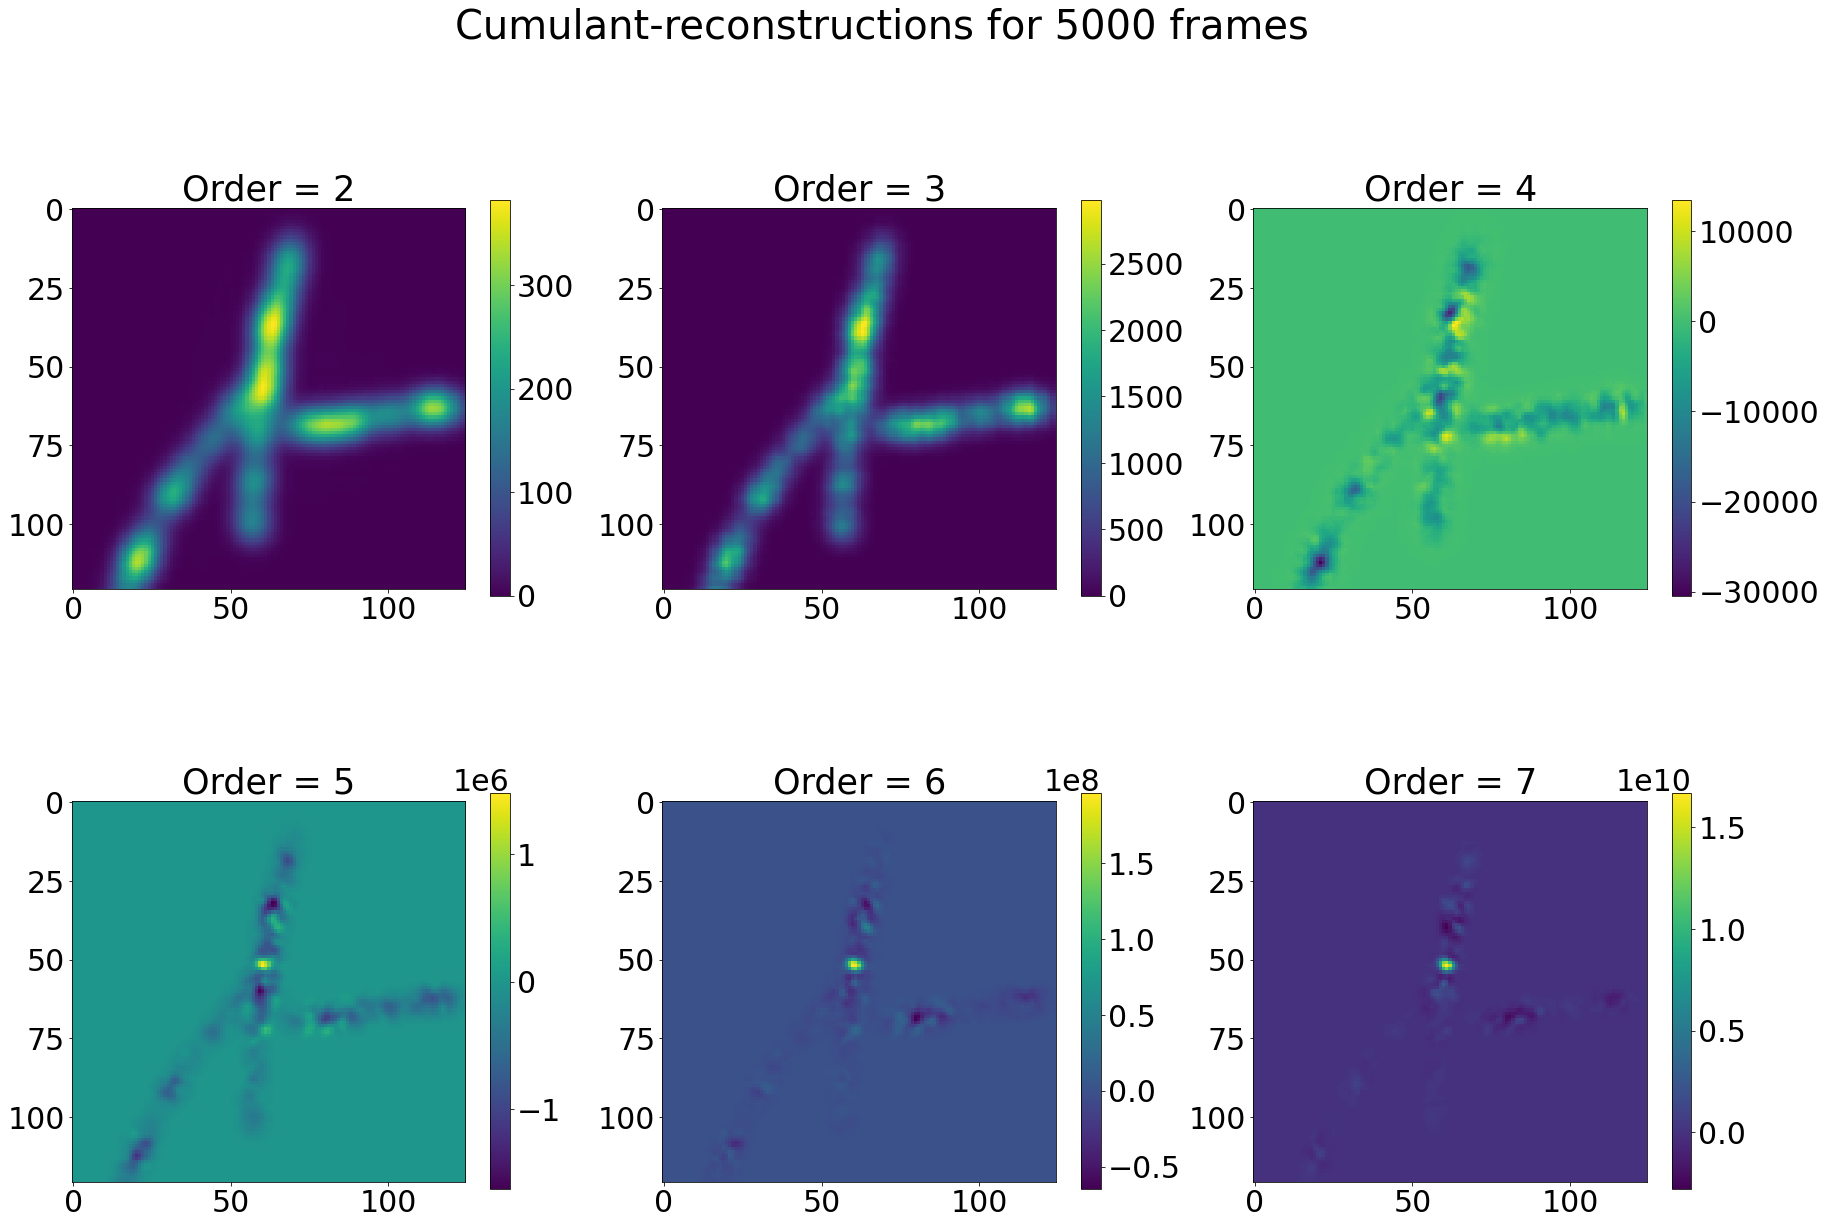

In [33]:
# 2. frame number = 5000    
k_set = allframe_data[4]
fig, axs = plt.subplots(2,3,figsize=(30,20))
fig.suptitle("Cumulant-reconstructions for 5000 frames", fontsize=40)
for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow(k_set[i]*0.8)
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax, shrink=0.8)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)

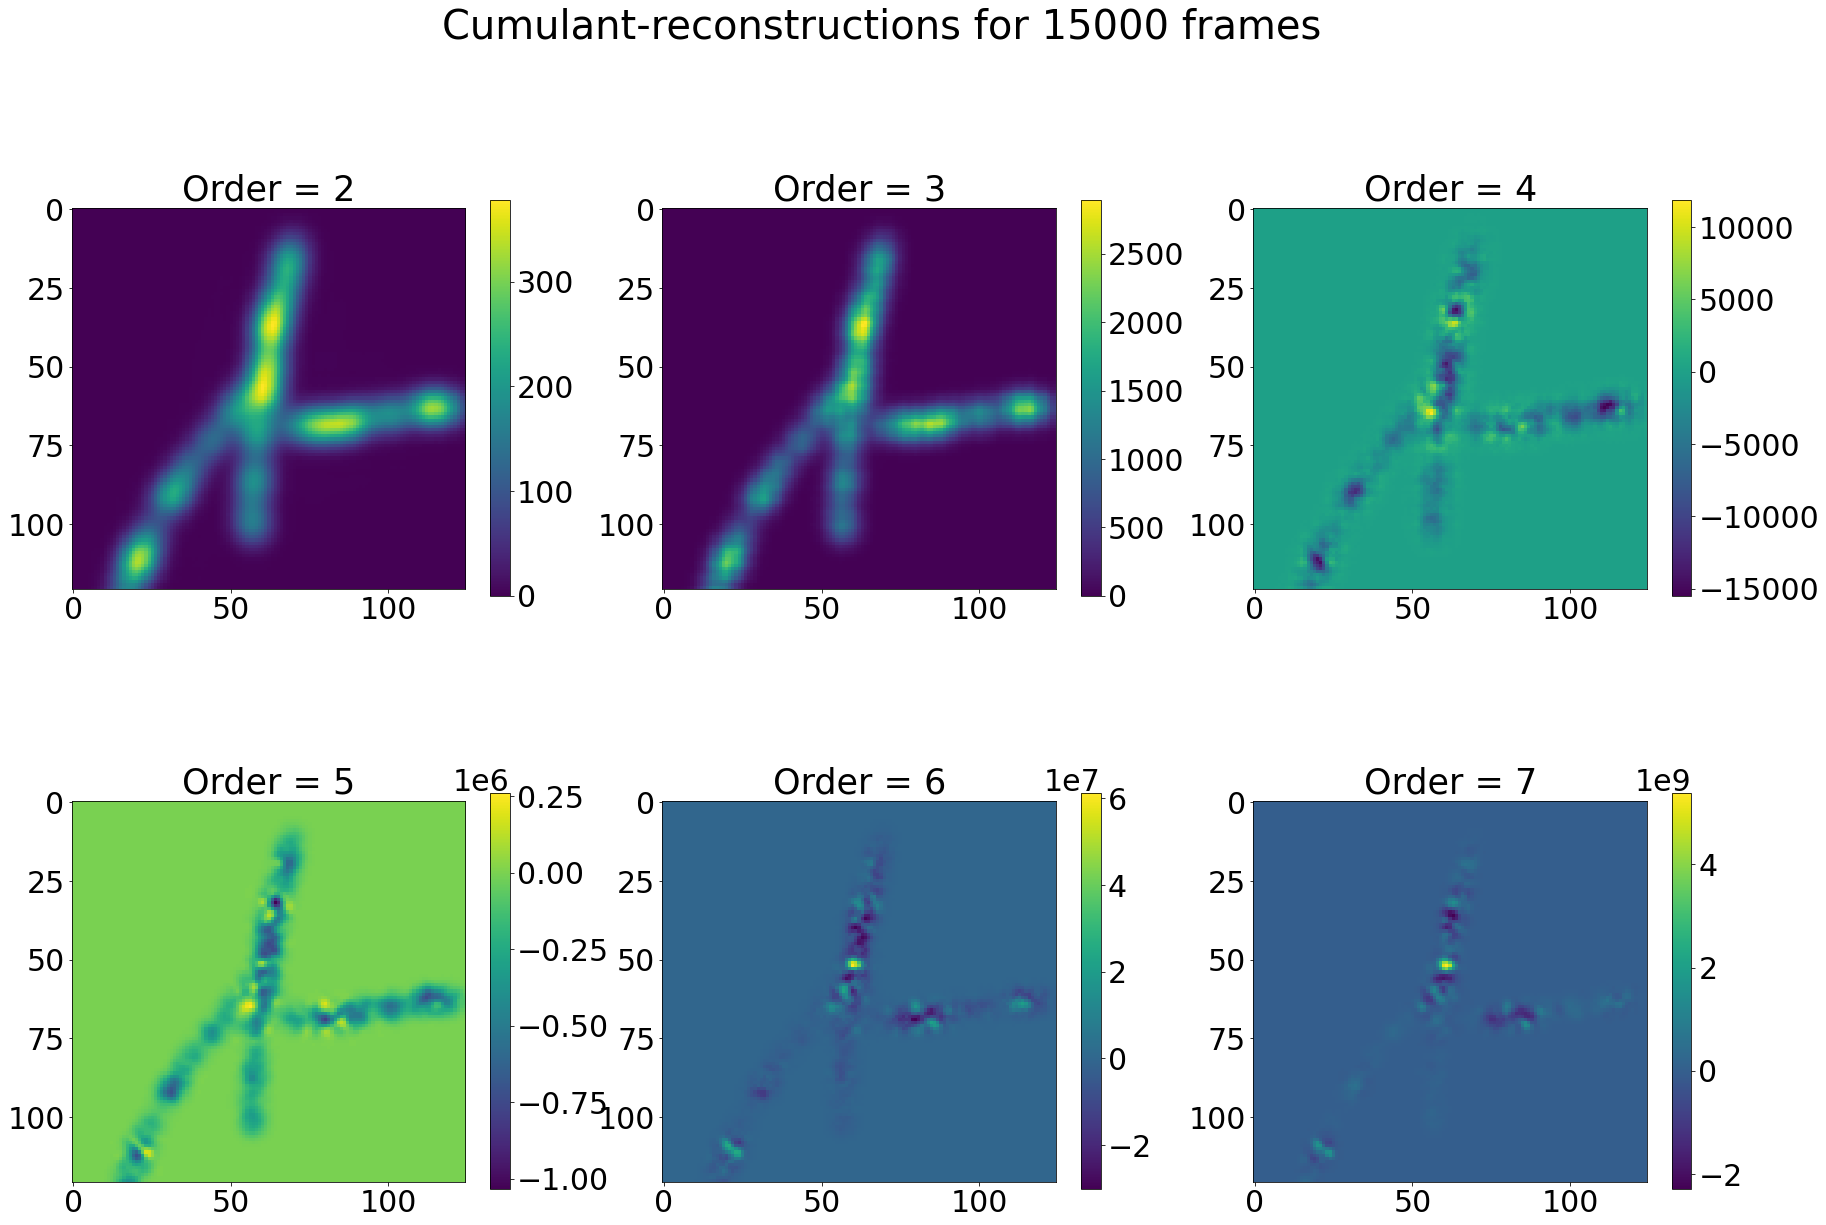

In [34]:
# 3. frame number = 15000    
k_set = allframe_data[14]
fig, axs = plt.subplots(2,3,figsize=(30,20))
fig.suptitle("Cumulant-reconstructions for 15000 frames", fontsize=40)

for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow(k_set[i]*0.8)
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax, shrink=0.8)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)

For <code>order=2</code>, the cumulant is always positive so there is no [cusp artifacts](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/Example_CuspArtifactsDemo1_3Emitters.ipynb), and the reconstruction convergences fast. For higher orders (<code>order>3</code>), reconstructions fluctuate between positive and negative, leading to potential cusp artifacts. 

### Convergence Exploration.
#### I. Compare the same order cumulant recontructions with increasing frame numbers.
We find that when the number of frames is small (<5000), the actual (calculated) value of $\rho$ deviates from the theoretical (true) $\rho$ greatly. As the number of frames increases, calculated $\rho$ gets closer to the theoretical value with decreasing fluctuations. At frame# = 20000, there are still a small portion of emitters that exhibit 'inaccurate' reconstruction compared to theoretical values.

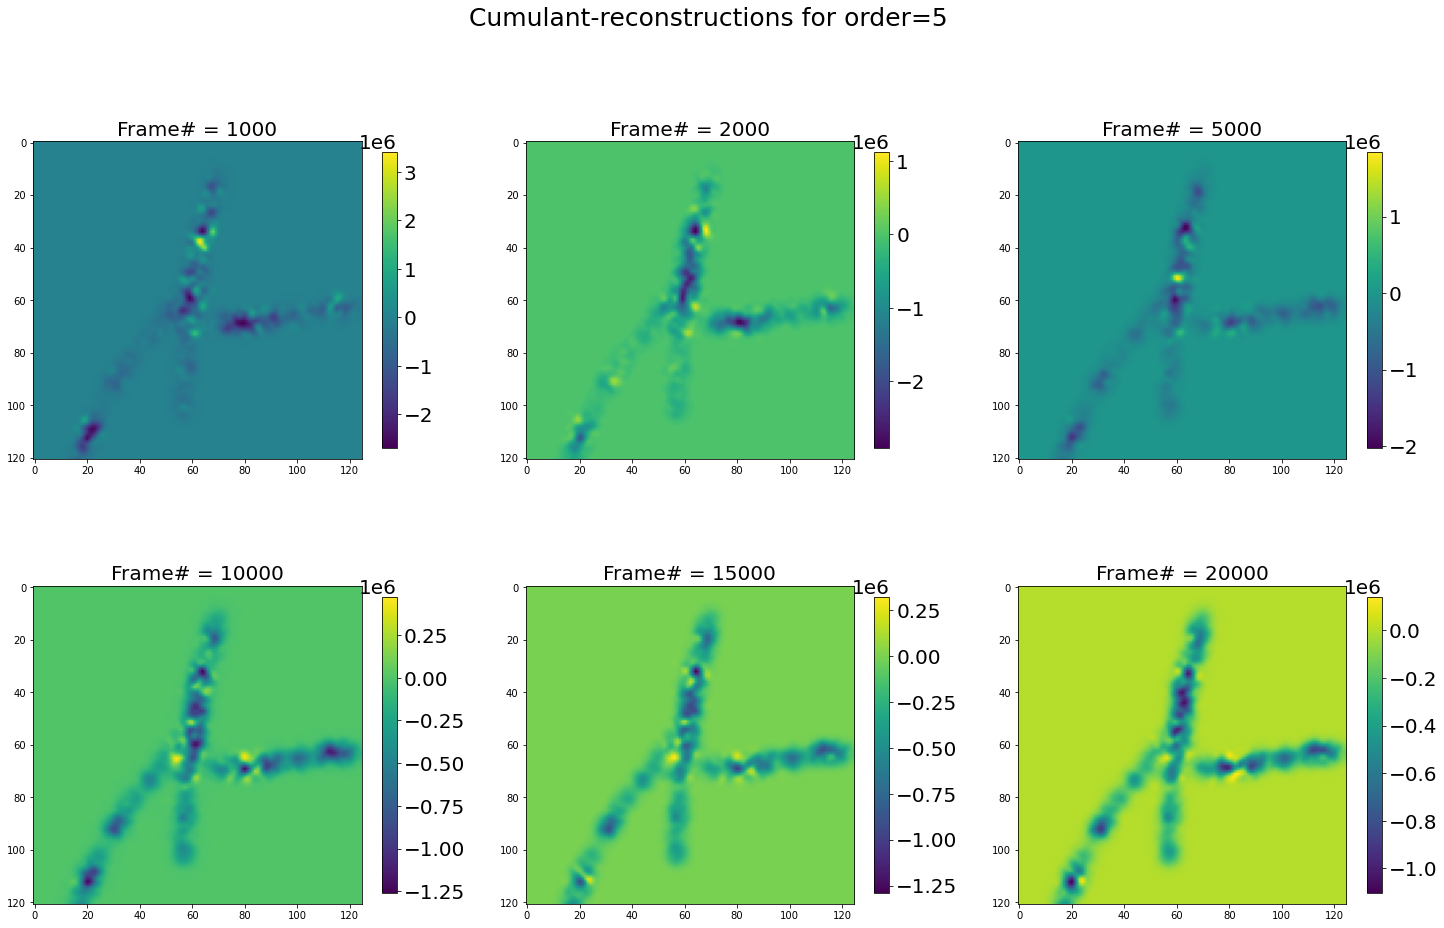

In [42]:
# Compare the same order cumulant recontructions (order=5) for different frame numbers 
# Take frame number = 1000, 2000, 5000, 10000, 15000, 20000 as the example
frames = [0, 1, 4, 9, 14, 19]    # corresponding order in 'allframe_data'
fig = plt.figure(figsize=(25,15))
fig.suptitle("Cumulant-reconstructions for order=5", fontsize=25)
for i in range(len(frames)):
    plt.subplot(2, 3, i+1)
    im = plt.imshow(allframe_data[frames[i]][5])
    plt.title(f'Frame# = {(frames[i]+1)*1000}', fontsize=20)
    cb = plt.colorbar(im, shrink=0.8)
    cb.ax.tick_params(labelsize=20)
    cb.ax.yaxis.get_offset_text().set_fontsize(20)

#### II. Total intensity v.s. frame number.

Below we plot the the total intensity (sum of all pixel values) as functions of frame number for several reconstruction orders. The plots verify our observation in I, that when frame number is small, the total intensify has a large fluctation and far away from the 'true' brightness. This fluctation decreases as the frame number increases, and the plot gets flatter, and finally, slightly oscillates / converges to a fixed value. For order = 4 ~ 7, the theoretical cumulant values for $\rho = 0.322$ are negative, negative, negative and positive, which match the convergent values in the plots.

We see a greater fluctuation for order=6, this is because that the cumulant value is actually very close to zero (fig. 1 of [this paper](https://www.biorxiv.org/content/10.1101/545574v2.full.pdf)). In this case, the reconstruction is more susceptible to heterogeneities in the photophysical properties of the emitters as well as the video length.

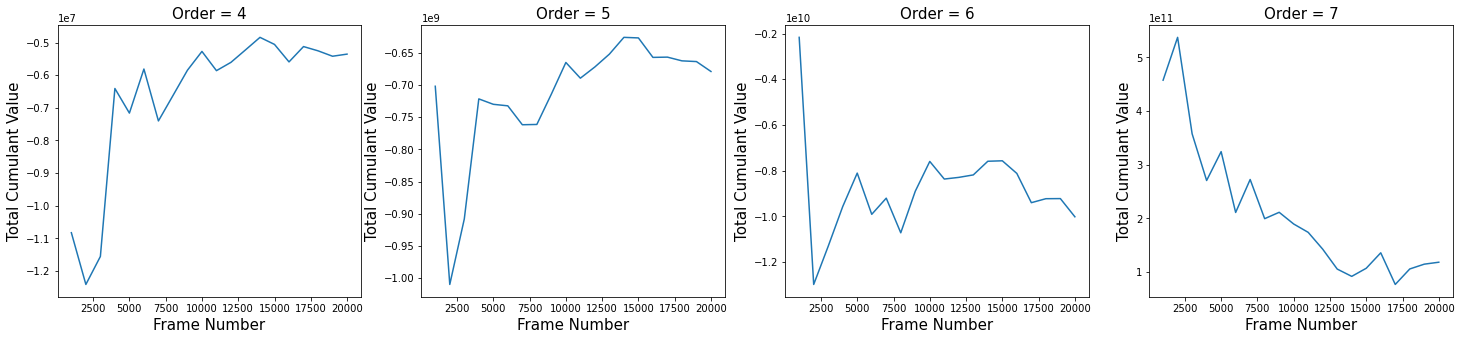

In [9]:
# total cumulant value
total_value= {}
for od in range(4,8):
    total_value[od] = []
    for i in range(20):    
        x = allframe_data[i][od]
        total_value[od].append(np.sum(x))

fig = plt.figure(figsize=(25,5))
for od, pp in total_value.items():
    plt.subplot(1, 4, od-3)
    plt.plot(frame_lst, pp, label = "order = "+str(od))
    plt.title(f'Order = {od}', fontsize=15)
    plt.xlabel("Frame Number", fontsize=15)
    plt.ylabel("Total Cumulant Value", fontsize=15)

#### III. Total intensity (sign error) v.s. frame number.

We also plot the total intensity of only pixels with wrong sign error and see how it converges. For instance, the theoretical cumulant value should be negative for order=4, so only positve pixels are considered. 

A similar converging trend as II is observed. Also, the higher the SOFI order, the higher the number of frames needed for SOFI processing to realize the theoretically predicted images and converge. 

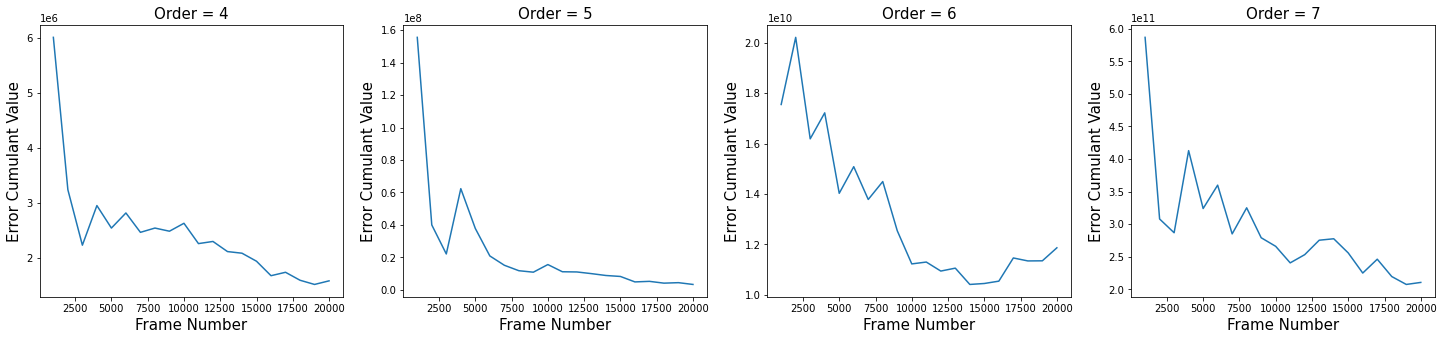

In [8]:
# total cumulant value of sign error
sign_error_value= {}
for od in range(4,8):
    sign_error_value[od] = []
    for i in range(20):    
        x = allframe_data[i][od]        
        if theo_sign[od-4] < 0:
            sign_error_value[od].append(np.sum(np.where(x < 0, 0, x)))
        else:
            sign_error_value[od].append(np.sum(np.where(x > 0, 0, -x)))

fig = plt.figure(figsize=(25,5))
for od, pp in sign_error_value.items():
    plt.subplot(1, 4, od-3)
    plt.plot(frame_lst, pp, label = "order = "+str(od))
    plt.title(f'Order = {od}', fontsize=15)
    plt.xlabel("Frame Number", fontsize=15)
    plt.ylabel("Error Cumulant Value", fontsize=15)

Below are some extra exploration on the SOFI reconstruction convergence. We hope it can help users learn more about this simulation or their data, and better determine the data acquisition specifications.

#### IV. Number of background pixels v.s. frame number.

We did not add in any backgound noise in this simulation except shot noise for the camera. When the data acquisition is not long enough, it is possible to introduce false or fake features and create more cusp-artifects.

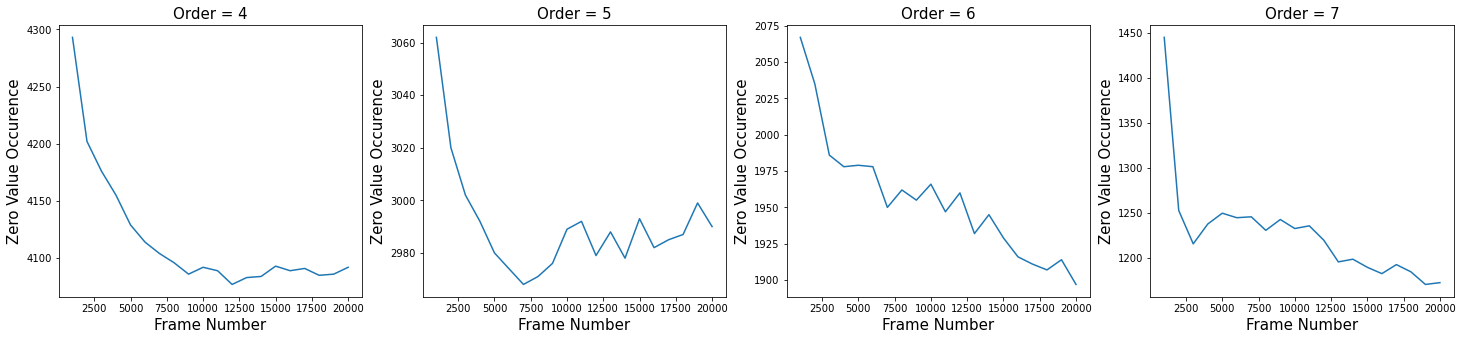

In [7]:
# Count the number of pixels which have zero values (background pixel)
zeros_num, num_diff = {}, {}
for od in range(4,8):
    zeros_num[od], num_diff[od] = [], []
    for i in range(20):    
        x = allframe_data[i][od]
        zeros_num[od].append(np.sum(x==0))
        if i > 0:
            num_diff[od].append(zeros_num[od][i-1]-zeros_num[od][i])

fig = plt.figure(figsize=(25,5))
for od, pp in zeros_num.items():
    plt.subplot(1, 4, od-3)
    plt.plot(frame_lst, pp, label = "order = "+str(od))
    plt.title(f'Order = {od}', fontsize=15)
    plt.xlabel("Frame Number", fontsize=15)
    plt.ylabel("Zero Value Occurence", fontsize=15)

#### V. Number of pixels (sign error) v.s. frame number.

The plots again verify that the higher the SOFI order, the more frames needed for SOFI processing to get close to theoretically predicted images. 

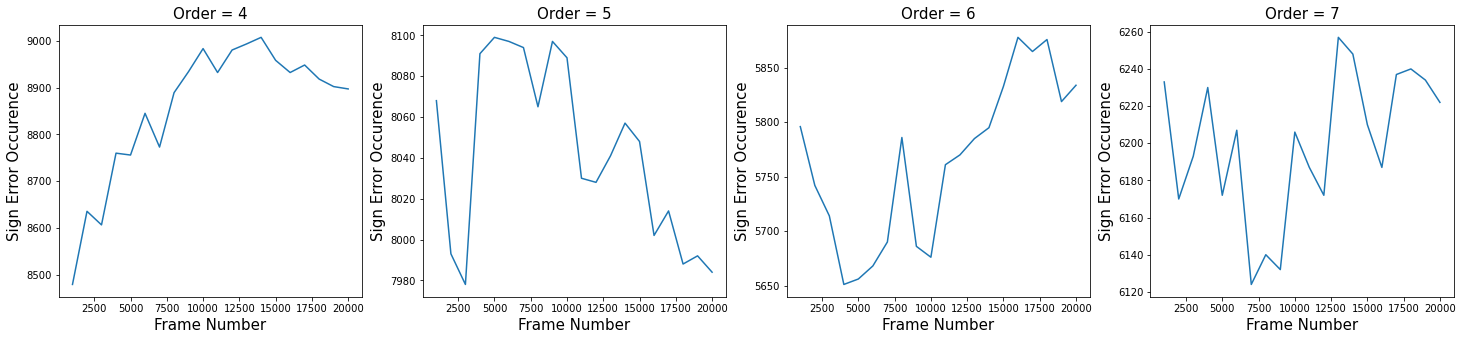

In [5]:
# plot number of sign error at different frame number
sign_error_num = {}
for od in range(4,8):
    sign_error_num[od] = []
    for i in range(20):    
        x = allframe_data[i][od]
        if theo_sign[od-4] < 0:
            sign_error_num[od].append(np.sum(x>0))
        else:
            sign_error_num[od].append(np.sum(x<0))

fig = plt.figure(figsize=(25,5))
for od, pp in sign_error_num.items():
    plt.subplot(1, 4, od-3)
    plt.plot(frame_lst, pp, label = "order = "+str(od))
    plt.title(f'Order = {od}', fontsize=15)
    plt.xlabel("Frame Number", fontsize=15)
    plt.ylabel("Sign Error Occurence", fontsize=15)

#### VI. Distribution of cumulant values.

Let us use histograms to visualize the distribution of pixel values. For the case of $\rho=0.322$ and order=4, the cumulant value should be negative. When the frame number is small, the distribution is relatively wide, and positive pixels take up a large portion of all pixels. As the frame number increases, not only the number of positive pixels drops, the values become smaller as well. It is reasonable to predict that if we further increase the acquisition time (frame number), all pixels would become negative (except backgournd) and converge to the theoretical / true value.

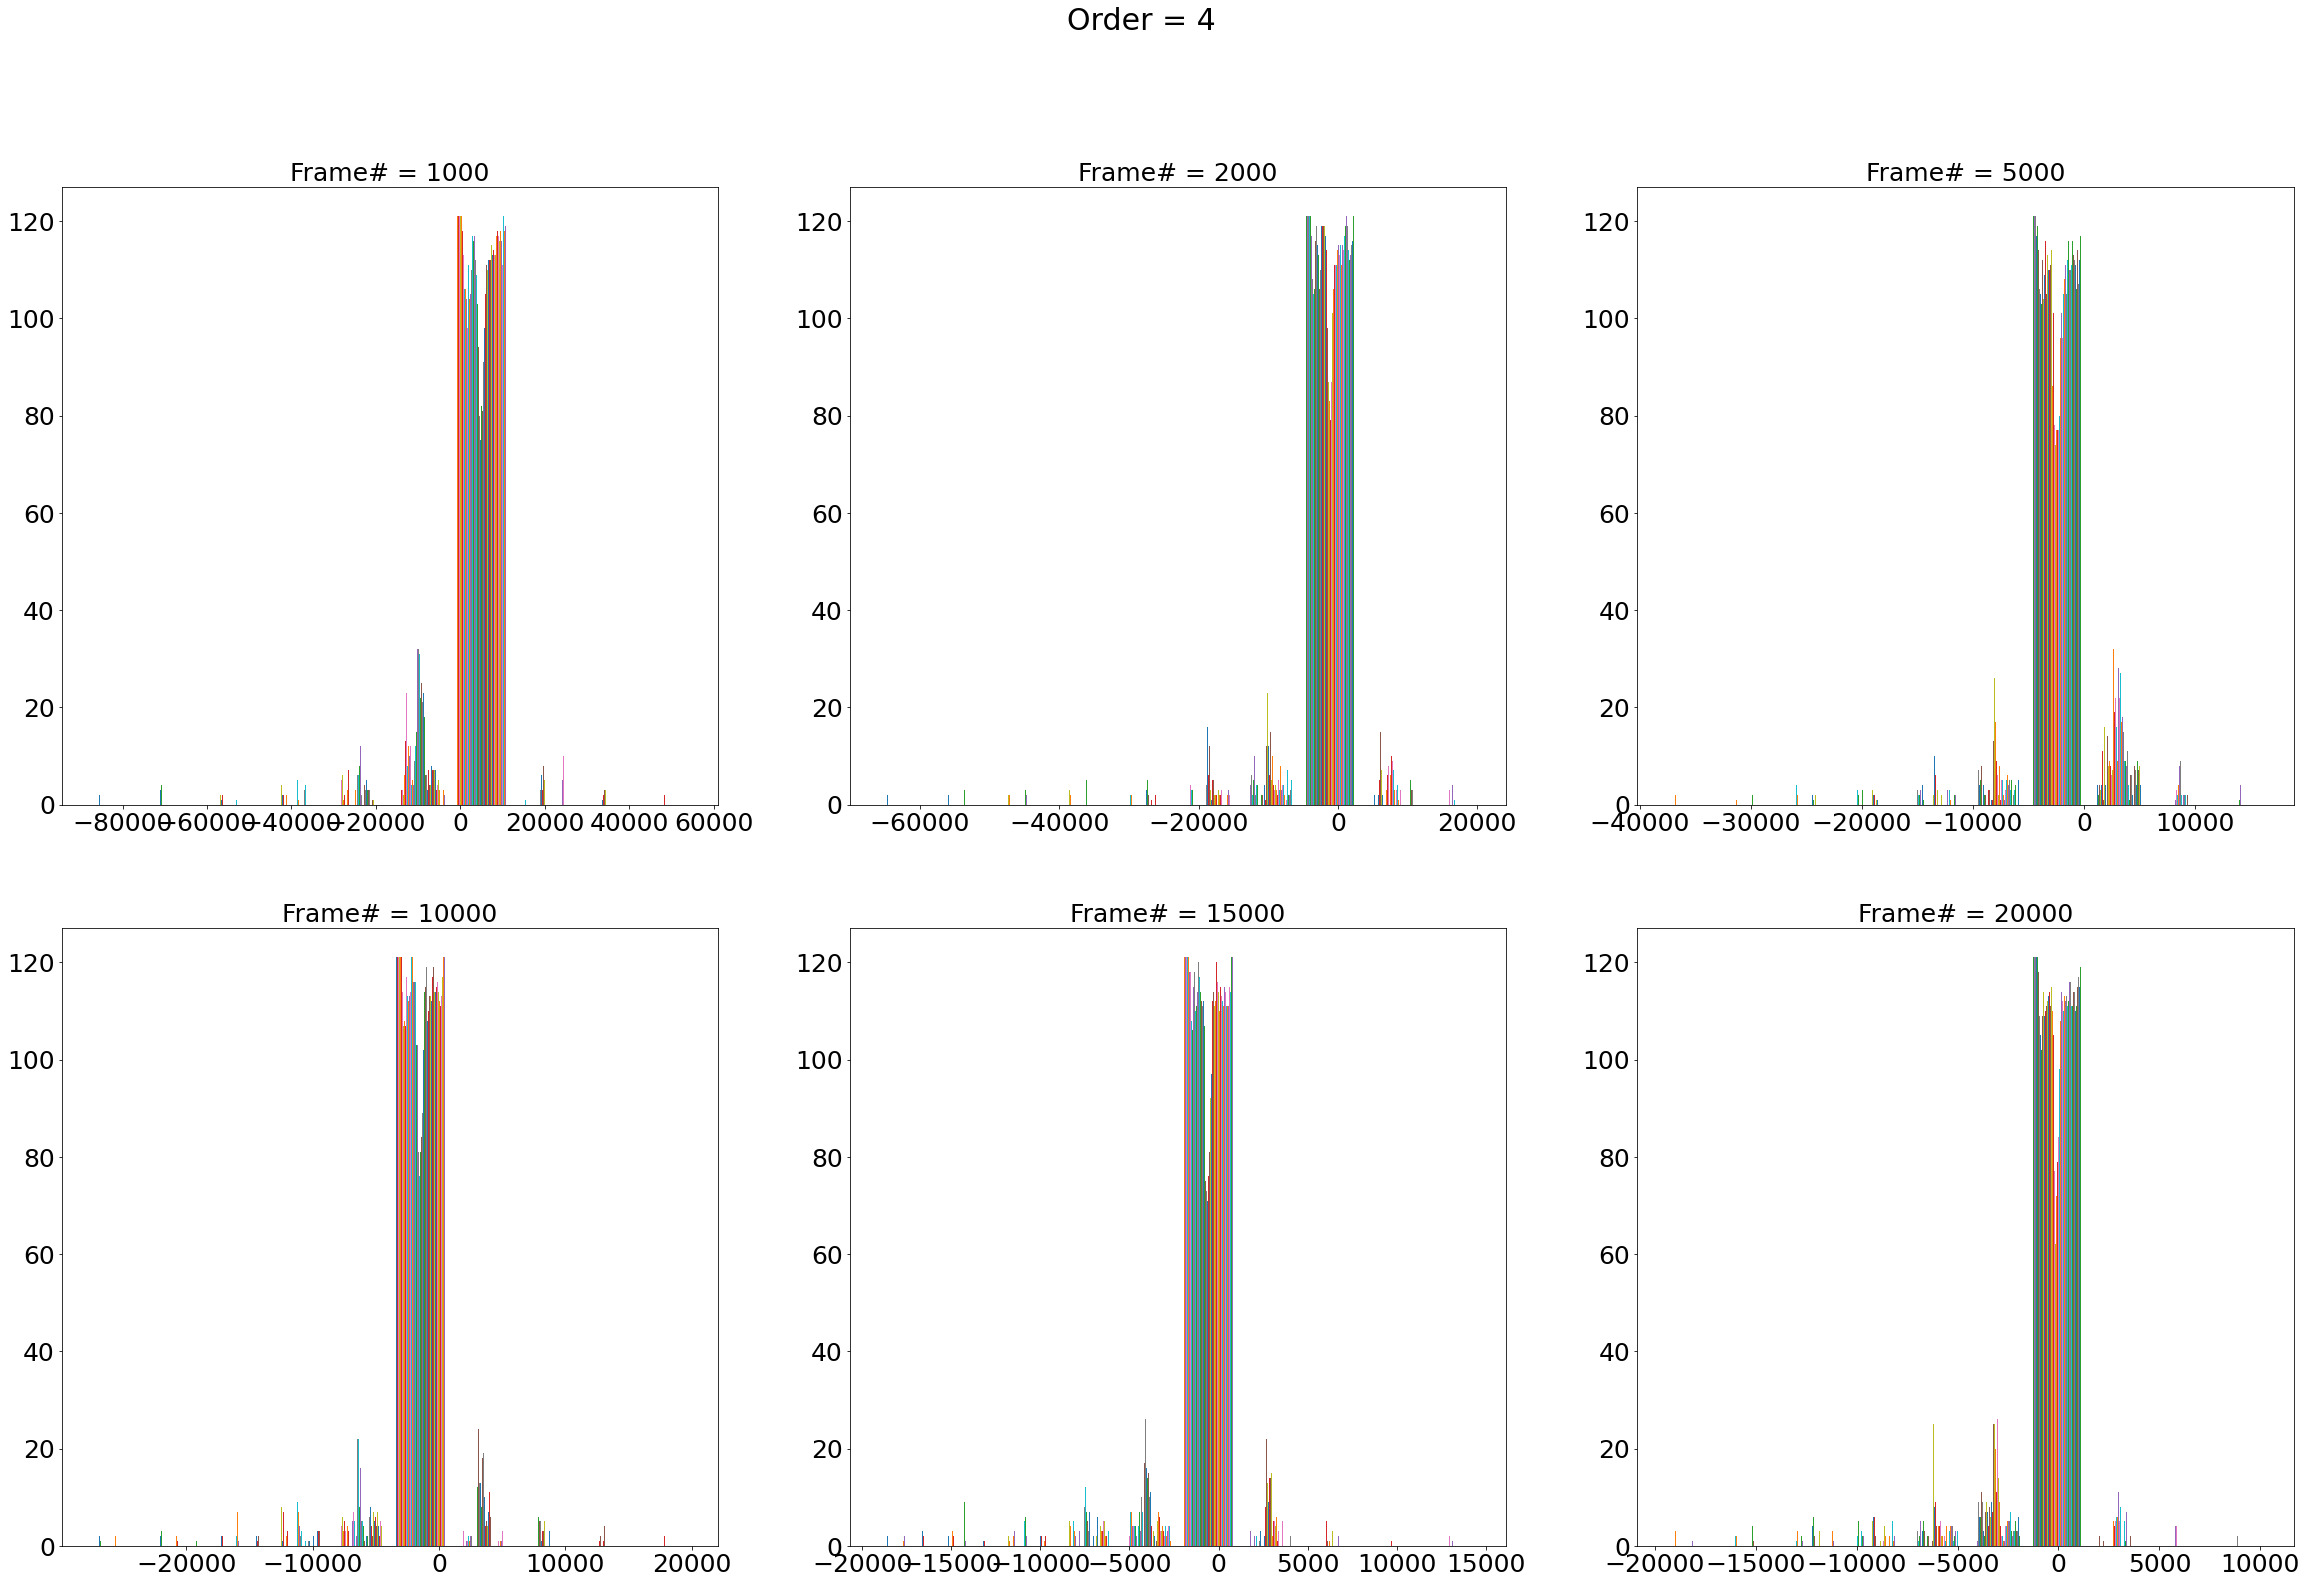

In [46]:
# plot historgram of cumulant values for order = 4 at different frame numbers
# Take frame number = 1000, 2000, 5000, 10000, 15000, 20000 as the example
frames = [0, 1, 4, 9, 14, 19]    # corresponding position in 'allframe_data'
fig = plt.figure(figsize=(40,25))
fig.suptitle(f'Order = {4}', fontsize=30)
for i in range(len(frames)):    
    plt.subplot(2, 3, i+1)
    plt.hist(allframe_data[frames[i]][4])
    plt.title(f'Frame# = {(frames[i]+1)*1000}', fontsize=25)
    plt.rc('xtick', labelsize=25)   
    plt.rc('ytick', labelsize=25) 

In [5]:
# plot all histograms of cumulant values for orders = 4, 5, 6, 7
# theoretically rho = 0.322
for od in range(4,8):
    fig = plt.figure(figsize=(40,25))
    fig.suptitle(f'Order = {od}', fontsize=35)
    for i in range(20):    # plot histogram at different frame number
        x = eval(compile("k_frame" + str(frame_lst[i]) + "[" + str(od) + "]", "<string>", "eval"))
        plt.subplot(3,5,i+1)
        if theo_sign[od-4] < 0:
            plt.hist(x, range=(500, np.max(x)))
        else:
            plt.hist(x, range=(np.min(x), -500))
        plt.title(f'Frame# = {frame_lst[i]}', fontsize=35)
        plt.rc('xtick', labelsize=18)   
        plt.rc('ytick', labelsize=18) 

9

### Conlusions.

If enough data (i.e., a large number of movie frames) with sufficient statistical significance has been collected, it is expected that the estimated on-time ratio, $\rho$, would converge to a theoretical $\rho$. If the blinking behavior
can be statistically described by a Poisson process (or Bernoulli statistics), it will converge to $\rho = \frac{\tau_{on}}{\tau_{on} + \tau_{off}} $.


As the total number of frames in the simulation is reduced, the actual (calculated) value of ρ starts to deviate from its estimated value. We also find that the higher the SOFI order, the higher the number of frames needed for SOFI processing to realize the theoretically predicted images. Moreover, since the high-order virtual brightnesses exhibit greater oscillations, they are more susceptible to heterogeneities in the photophysical properties of the emitters and hence more vulnerable to cusp artifacts. 

Noise may severely degrades the quality of the images, especially for the cumulant orders with a large proportion of positive virtual emitters. 

### Simulation details.

The simulated vidoe is generated by a simulator called [SR_Simu3D](https://github.com/xiyuyi/SR_simu3D). This modularized simulator generates feature of interests, feature dynamics, random emitter labeling, emitter blinking sequences and far-field images/videos in seperate modules. For more details on the simulator, please refer to appendix 5 of [this paper](https://www.biorxiv.org/content/10.1101/500819v7).

For the example used in this notebook, we generate 3 random filamentous curves (200 link nodes each) by random walk-based Monte Carlo simulations. 90 labeling sites are randomly selected among all nodes, and the blinking sequence of each emitter is generated with $\tau_{on} = 0.038$ and $\tau_{off} = 0.08$. The frame rate of the video is 30 ms with signal level equals to 20000. For this simulated video, photobleaching is not added. Fo the effect of photobleaching and demonstration on bleaching correction, please refer to this [notebook](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/Example_BleachingCorrection.ipynb).